<h1> Arcane's Effect on League of Legends</h1>
<h4> Alex Baumgartner</h4>


League of Legends is one of the largest video games of all time. Throughout its 10 years of stardom, the community has been growing at a steady pace. Riot Games, the creator's of League of Legends, have recently started broadening their influence, creating several other titles such as Valorant, Legends of Runeterra, Teamfight Tactics, and several smaller games developed through their publishing label Riot Forge.<p></p>
Riot's most recent endeavor was Arcane: a 9 episode Netflix series that aired on November 6th, 2021, and was fully released by November 20th. Arcane was wildly successful and almost immediately was within the top 10 chart in over 50 countries. The show was also Netflix's number one program in the month of November.<p>
Arcane prominently featured eight characters from League of Legends. After the massive success of Arcane, it would only make sense that these champions would become more popular as well.

In [2]:
import pandas as pd
import requests 
from bs4 import BeautifulSoup
import matplotlib
from matplotlib import pyplot as plt
import html5lib
import numpy as np

In [3]:
url2 = "https://www.metasrc.com/5v5/stats"
response2 = requests.get(url2)

After reading in the data from Meta src, a website that updates each patch and contains useful information, mainly pick and ban rates for champions, we can begin to prep our data for analysis.

In [4]:
rates_1124 = pd.read_html(response2.text)
rates_1124_df = rates_1124[0]
rates_1124_df

,Name,Role,Tier,Score,Trend,Win %,Role %,Pick %,Ban %,KDA
0,AatroxAatrox,TOP,Weak / C,40.02,-3.63,46.36%,92.38%,3.25%,2.22%,1.89
1,AhriAhri,MID,Good / A,53.86,+2.54,50.36%,88.11%,4.39%,1.34%,2.49
2,AkaliAkali,MID,Strong / S,63.43,+5.95,50.53%,61.80%,7.30%,10.50%,2.29
3,AkaliAkali,TOP,Good / A,53.99,+3.46,49.38%,37.80%,4.12%,10.50%,2.03
4,AkshanAkshan,TOP,Good / A,48.26,+6.93,52.38%,29.04%,1.99%,12.42%,1.91
...,...,...,...,...,...,...,...,...,...,...
235,ZiggsZiggs,MID,Good / A,47.60,+9.41,52.53%,23.54%,0.90%,0.81%,2.39
236,ZileanZilean,SUPPORT,Fair / B,45.58,-5.55,49.32%,85.28%,3.32%,1.29%,2.72
237,ZileanZilean,MID,Fair / B,43.94,-6.45,49.34%,12.24%,0.48%,1.44%,3.02
238,ZoeZoe,MID,Fair / B,42.54,-5.04,46.59%,93.15%,3.46%,1.67%,2.30


In [5]:
rates_1124_df.sort_values(by = 'Ban %', ascending=False)

,Name,Role,Tier,Score,Trend,Win %,Role %,Pick %,Ban %,KDA
24,CamilleCamille,TOP,God / S+,74.10,-20.08,51.90%,95.76%,6.73%,9.91%,1.98
43,FioraFiora,TOP,Strong / S,69.74,+8.11,53.66%,97.29%,5.47%,9.80%,1.85
119,NocturneNocturne,JUNGLE,Good / A,51.57,-1.53,49.71%,94.80%,5.00%,9.40%,2.28
158,SettSett,TOP,God / S+,76.21,+3.69,49.57%,84.25%,8.35%,9.33%,1.77
40,EvelynnEvelynn,JUNGLE,Good / A,47.20,+4.68,48.77%,97.99%,3.48%,8.27%,2.77
...,...,...,...,...,...,...,...,...,...,...
63,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
127,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
159,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


After reading it in, I tried to sort it by Pick Rate, but I would only get results under 10%. After looking around online, I changed the data to a float object and removed the % from the value, and then it started working.

In [6]:
rates_1124_df['Pick %'] = rates_1124_df['Pick %'].str.rstrip('%').astype('float')
rates_1124_df['Ban %'] = rates_1124_df['Ban %'].str.rstrip('%').astype('float')

After getting the data to sort correctly, I can now load in 3 more sets of data and do the same methods to those as well. This set of data is for the most recent patch, 11.24, which released on December 8th. The other patches I will look at are 11.23, which released on November 17th, which was during the peak of Arcane's popularity and hype while the show was also finished, as well as patch 11.22, which released on November 3rd, before Arcane released. Additionally, I will be looking at patch 11.21, which will help to showcase trends more. For example, if a champion has been falling out of the meta, looking at four sets of data will help to better recognize any downward or upward trends. This will give us 4 points of data for each statistic, giving us an idea of where each Champion was popularity wise before Arcane, as well as during and after its release. 

In [7]:
url3 = "https://www.metasrc.com/5v5/11.23/stats"
response3 = requests.get(url3)

rates_1123 = pd.read_html(response3.text)
rates_1123_df = rates_1123[0]
rates_1123_df

,Name,Role,Tier,Score,Trend,Win %,Role %,Pick %,Ban %,KDA
0,AatroxAatrox,TOP,Fair / B,43.65,-8.68,47.67%,90.53%,3.20%,2.29%,1.92
1,AhriAhri,MID,Good / A,51.31,-5.46,50.73%,90.56%,3.75%,1.14%,2.49
2,AkaliAkali,MID,Good / A,57.47,-1.21,48.80%,61.82%,6.72%,8.87%,2.34
3,AkaliAkali,TOP,Good / A,50.53,+4.09,48.52%,37.69%,3.70%,8.87%,2.07
4,AkshanAkshan,MID,Good / A,52.54,-1.22,51.67%,64.34%,3.56%,13.44%,2.20
...,...,...,...,...,...,...,...,...,...,...
243,ZiggsZiggs,MID,Weak / C,38.19,-0.19,48.92%,21.34%,0.84%,1.01%,2.39
244,ZileanZilean,SUPPORT,Good / A,51.13,+0.91,50.75%,85.65%,3.49%,1.63%,2.93
245,ZileanZilean,MID,Good / A,50.39,999NEW,53.31%,11.05%,0.41%,1.63%,3.19
246,ZoeZoe,MID,Good / A,47.58,-3.38,48.99%,92.74%,3.69%,1.68%,2.47


In [8]:
rates_1123_df['Pick %'] = rates_1123_df['Pick %'].str.rstrip('%').astype('float')
rates_1123_df['Ban %'] = rates_1123_df['Ban %'].str.rstrip('%').astype('float')

In [9]:
url4 = "https://www.metasrc.com/5v5/11.22/stats"
response4 = requests.get(url4)

rates_1122 = pd.read_html(response4.text)
rates_1122_df = rates_1122[0]
rates_1122_df['Pick %'] = rates_1122_df['Pick %'].str.rstrip('%').astype('float')
rates_1122_df['Ban %'] = rates_1122_df['Ban %'].str.rstrip('%').astype('float')
rates_1122_df.sort_values('Pick %', ascending = False)

,Name,Role,Tier,Score,Trend,Win %,Role %,Pick %,Ban %,KDA
72,JhinJhin,ADC,God / S+,93.97,13.03,51.25%,98.84%,26.37,5.19,2.92
99,LucianLucian,ADC,God / S+,75.90,-10.27,49.65%,91.62%,18.02,17.44,2.24
110,Miss FortuneMiss Fortune,ADC,God / S+,72.01,-21.13,51.11%,97.73%,16.72,8.07,2.33
113,NamiNami,SUPPORT,God / S+,89.87,7.92,51.39%,99.80%,16.20,12.80,3.20
93,Lee SinLee Sin,JUNGLE,God / S+,90.96,2.87,47.90%,95.64%,15.94,17.65,2.78
...,...,...,...,...,...,...,...,...,...,...
63,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
127,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
159,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
url5 = "https://www.metasrc.com/5v5/11.21/stats"
response5 = requests.get(url5)

rates_1121 = pd.read_html(response5.text)
rates_1121_df = rates_1121[0]
rates_1121_df['Pick %'] = rates_1121_df['Pick %'].str.rstrip('%').astype('float')
rates_1121_df['Ban %'] = rates_1121_df['Ban %'].str.rstrip('%').astype('float')
rates_1121_df.sort_values('Pick %', ascending = False).head(20)

,Name,Role,Tier,Score,Trend,Win %,Role %,Pick %,Ban %,KDA
112,Miss FortuneMiss Fortune,ADC,God / S+,93.14,-1.10,50.89%,98.35%,24.21,14.06,2.35
101,LucianLucian,ADC,God / S+,86.17,+8.53,49.83%,92.13%,20.84,18.83,2.28
73,JhinJhin,ADC,God / S+,80.94,+13.31,51.19%,98.70%,19.44,3.22,2.91
40,EzrealEzreal,ADC,God / S+,70.12,-0.01,48.19%,97.51%,18.34,5.09,2.44
115,NamiNami,SUPPORT,God / S+,81.95,-9.22,51.42%,99.82%,17.56,11.98,3.21
96,Lee SinLee Sin,JUNGLE,God / S+,88.08,-4.90,46.99%,95.58%,15.76,17.83,2.72
226,YasuoYasuo,MID,God / S+,90.65,+11.79,51.00%,71.04%,13.95,22.65,1.83
232,YuumiYuumi,SUPPORT,God / S+,95.26,-0.11,49.69%,99.54%,13.17,47.53,4.30
190,ThreshThresh,SUPPORT,Strong / S,65.71,-2.55,49.44%,99.34%,13.15,7.58,2.60
212,ViegoViego,JUNGLE,God / S+,78.62,+29.75,50.13%,90.58%,12.92,10.77,2.50


After doing the same treatment to all 4 sets of data, we can begin setting them up for analysis. I created each a variable for each character's data from all 4 sets, and from there I can create a final data frame with the data I want.

In [21]:
Caitlyn21 = rates_1121_df.loc[rates_1121_df['Name'] == 'CaitlynCaitlyn']
Caitlyn22 = rates_1122_df.loc[rates_1122_df['Name'] == 'CaitlynCaitlyn']
Caitlyn23 = rates_1123_df.loc[rates_1123_df['Name'] == 'CaitlynCaitlyn']
Caitlyn24 = rates_1124_df.loc[rates_1124_df['Name'] == 'CaitlynCaitlyn']

Jinx21 = rates_1121_df.loc[rates_1121_df['Name'] == 'JinxJinx']
Jinx22 = rates_1122_df.loc[rates_1122_df['Name'] == 'JinxJinx']
Jinx23 = rates_1123_df.loc[rates_1123_df['Name'] == 'JinxJinx']
Jinx24 = rates_1124_df.loc[rates_1124_df['Name'] == 'JinxJinx']

Jayce21 = rates_1121_df.loc[rates_1121_df['Name'] == 'JayceJayce']
Jayce22 = rates_1122_df.loc[rates_1122_df['Name'] == 'JayceJayce']
Jayce23 = rates_1123_df.loc[rates_1123_df['Name'] == 'JayceJayce']
Jayce24 = rates_1124_df.loc[rates_1124_df['Name'] == 'JayceJayce']

Ekko21 = rates_1121_df.loc[rates_1121_df['Name'] == 'EkkoEkko']
Ekko22 = rates_1122_df.loc[rates_1122_df['Name'] == 'EkkoEkko']
Ekko23 = rates_1123_df.loc[rates_1123_df['Name'] == 'EkkoEkko']
Ekko24 = rates_1124_df.loc[rates_1124_df['Name'] == 'EkkoEkko']

Heimerdinger21 = rates_1121_df.loc[rates_1121_df['Name'] == 'HeimerdingerHeimerdinger']
Heimerdinger22 = rates_1122_df.loc[rates_1122_df['Name'] == 'HeimerdingerHeimerdinger']
Heimerdinger23 = rates_1123_df.loc[rates_1123_df['Name'] == 'HeimerdingerHeimerdinger']
Heimerdinger24 = rates_1124_df.loc[rates_1124_df['Name'] == 'HeimerdingerHeimerdinger']

Singed21 = rates_1121_df.loc[rates_1121_df['Name'] == 'SingedSinged']
Singed22 = rates_1122_df.loc[rates_1122_df['Name'] == 'SingedSinged']
Singed23 = rates_1123_df.loc[rates_1123_df['Name'] == 'SingedSinged']
Singed24 = rates_1124_df.loc[rates_1124_df['Name'] == 'SingedSinged']

Vi21 = rates_1121_df.loc[rates_1121_df['Name'] == 'ViVi']
Vi22 = rates_1122_df.loc[rates_1122_df['Name'] == 'ViVi']
Vi23 = rates_1123_df.loc[rates_1123_df['Name'] == 'ViVi']
Vi24 = rates_1124_df.loc[rates_1124_df['Name'] == 'ViVi']

Viktor21 = rates_1121_df.loc[rates_1121_df['Name'] == 'ViktorViktor']
Viktor22 = rates_1122_df.loc[rates_1122_df['Name'] == 'ViktorViktor']
Viktor23 = rates_1123_df.loc[rates_1123_df['Name'] == 'ViktorViktor']
Viktor24 = rates_1124_df.loc[rates_1124_df['Name'] == 'ViktorViktor']

At this point, cleaning up this data frame would take a lot of effort in renaming every line and removing the unnecessary ones, so I decided to create a new data frame with all the relevant data. Additionally, I would have had to mess with the formatting to visualize it effectively, so by making a new data frame I can organize the data how I wish. 

I chose to look at Pick Rates and Ban rates for all of the 8 Champions represented in Arcane across the 4 patches worth of data. For Champions that had multiple roles with data, I chose the most prevalent, as it would likely illustrate the impact of Arcane the best.

In [29]:
Viktor21

,Name,Role,Tier,Score,Trend,Win %,Role %,Pick %,Ban %,KDA
213,ViktorViktor,MID,Fair / B,46.82,-0.56,50.35%,90.91%,2.78,0.29,2.3


In [31]:
Champion_Data = pd.DataFrame({
    "Champion": ["Caitlyn", "Ekko", "Heimerdinger", "Jayce", "Jinx", "Singed", "Vi", "Viktor"],
    "Patch 11.21 Pick Rate": [11.35, 8.35, 0.89, 4.63, 11.78, 2.00, 2.58, 2.78, ],
    "Patch 11.21 Ban Rate": [5.05, 6.71, 1.64, 1.15, 1.17, 0.55, 0.46, 0.29],
    "Patch 11.22 Pick Rate": [13.89, 8.23, 0.92, 6.69, 12.99, 1.97, 6.18, 3.38],
    "Patch 11.22 Ban Rate": [5.81, 7.21, 0.96, 1.14, 1.22, 0.61, 1.79, 0.36],
    "Patch 11.23 Pick Rate": [25.72, 7.39, 1.02, 10.62, 23.98, 2.25, 10.85, 10.63],
    "Patch 11.23 Ban Rate": [13.45, 5.3, 1.15, 3.24, 4.84, 0.68, 5.55, 7.92],
    "Patch 11.24 Pick Rate": [24.35, 7.18, 0.99, 10.34, 23.31, 1.79, 9.37, 11.13],
    "Patch 11.24 Ban Rate": [17.11, 4.94, 1.18, 4.68, 7.58, 0.35, 6.24, 18.93]})

In [32]:
Champion_Data

,Champion,Patch 11.21 Pick Rate,Patch 11.21 Ban Rate,Patch 11.22 Pick Rate,Patch 11.22 Ban Rate,Patch 11.23 Pick Rate,Patch 11.23 Ban Rate,Patch 11.24 Pick Rate,Patch 11.24 Ban Rate
0,Caitlyn,11.35,5.05,13.89,5.81,25.72,13.45,24.35,17.11
1,Ekko,8.35,6.71,8.23,7.21,7.39,5.30,7.18,4.94
2,Heimerdinger,0.89,1.64,0.92,0.96,1.02,1.15,0.99,1.18
3,Jayce,4.63,1.15,6.69,1.14,10.62,3.24,10.34,4.68
4,Jinx,11.78,1.17,12.99,1.22,23.98,4.84,23.31,7.58
5,Singed,2.00,0.55,1.97,0.61,2.25,0.68,1.79,0.35
6,Vi,2.58,0.46,6.18,1.79,10.85,5.55,9.37,6.24
7,Viktor,2.78,0.29,3.38,0.36,10.63,7.92,11.13,18.93


After finishing my succinct data frame, I graphed the data as well. The results are generally what can be expected. Almost all of the champions saw an increase in pick rate while Arcane was being released, with the only exception being Ekko.

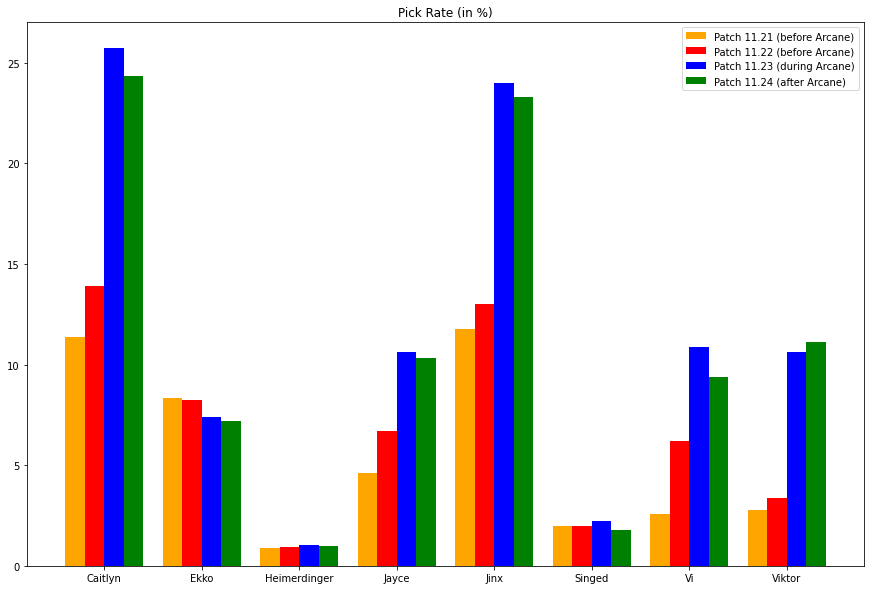

In [39]:
fig2, ax2 = plt.subplots(figsize=(15,10))
x = [1, 2.25, 3.5, 4.75, 6, 7.25, 8.5, 9.75]
ax2.bar([x-.375 for x in x], Champion_Data['Patch 11.21 Pick Rate'], color = 'orange', label = 'Patch 11.21 (before Arcane)', width = .25)
ax2.bar([x-.125 for x in x], Champion_Data['Patch 11.22 Pick Rate'], color = 'r', label = 'Patch 11.22 (before Arcane)', width = .25)
ax2.bar([x+.125 for x in x], Champion_Data['Patch 11.23 Pick Rate'], color = 'b', label = 'Patch 11.23 (during Arcane)', width = .25)
ax2.bar([x+.375 for x in x], Champion_Data['Patch 11.24 Pick Rate'], color = 'g', label = 'Patch 11.24 (after Arcane)', width = .25)
ax2.set_xticks(x)
ax2.set_xticklabels(Champion_Data['Champion'])
ax2.set_title('Pick Rate (in %)')
ax2.legend()

These results make sense. Every champion besides Ekko saw an increase in pick rate, and most of them were significant. Ekko, Singed and Heimerdinger were the champions with the least growth, which also makes sense logically. The other five characters had much larger roles in Arcane, and significantly more screen time as well. This could be a factor in their popularity, as viewers had less time to see their character develop and love or hate them as a character. Additionally, Heimerdinger and Singed are very uncommon champions, and are very different from other champions. They have very unique playstyles, which would makes them significantly harder to begin playing, especially in comparison to a straight-forward champion such as Jinx. 

A champion's popularity does have a factor in their pick rate, but there are also several other factors that go into it. A champion's strength fluctuates as they get strengthened or weakened throughout patches, and this has a massive impact on their play rate. While pick rate is a good gauge of a champion's strength, we can look at ban rate as well.

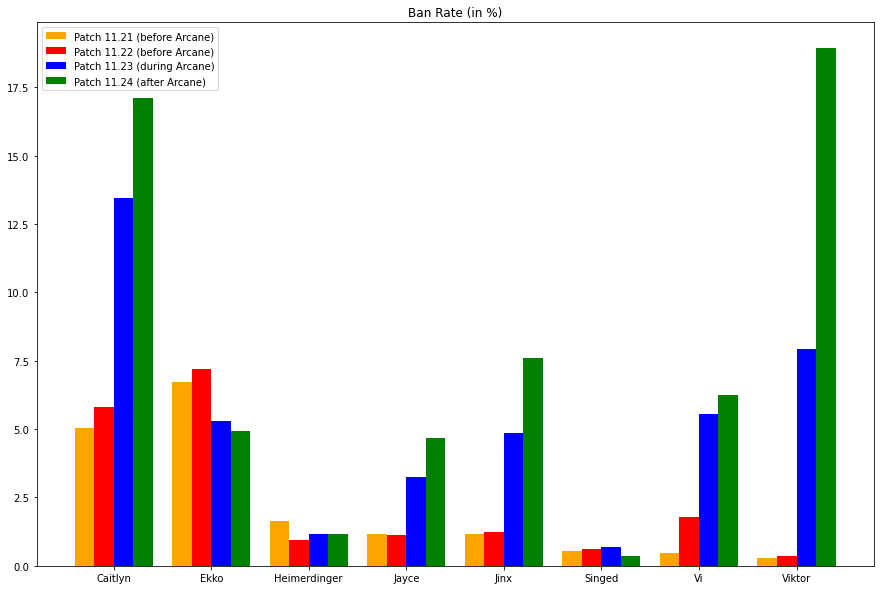

In [36]:
fig3, ax3 = plt.subplots(figsize=(15,10))
x = [1, 2.25, 3.5, 4.75, 6, 7.25, 8.5, 9.75]
ax3.bar([x-.375 for x in x], Champion_Data['Patch 11.21 Ban Rate'], color = 'orange', label = 'Patch 11.21 (before Arcane)', width = .25)
ax3.bar([x-.125 for x in x], Champion_Data['Patch 11.22 Ban Rate'], color = 'r', label = 'Patch 11.22 (before Arcane)', width = .25)
ax3.bar([x+.125 for x in x], Champion_Data['Patch 11.23 Ban Rate'], color = 'b', label = 'Patch 11.23 (during Arcane)', width = .25)
ax3.bar([x+.375 for x in x], Champion_Data['Patch 11.24 Ban Rate'], color = 'g', label = 'Patch 11.24 (after Arcane)', width = .25)

ax3.set_xticks(x)
ax3.set_xticklabels(Champion_Data['Champion'])
ax3.set_title('Ban Rate (in %)')
ax3.legend()

In every draft style game of League of Legends, each player is able to ban 1 champion for that game. Champions are generally banned because of their current strength, or if they have a particularly annoying play style. For example, Zed, one of the most frustrating assassins to play against, has had a ban rate of near 40% for the past 10 patches. This does not mean that Zed has been the best or strongest champion for these 10 patches, but he is still consistently banned because of how frustrating it is to play against him. Additionally, as champions are becoming more popularity, more people become aware of their strengths. If a champion has a spike in popularity, they will often have a small spike in ban rate as well. These spikes, if they are together, can be a signifier of strength, although they can also show the popularity. If a champion is frustrating to play against, but is not particularly strong, they will not have a high ban rate. If that champion begins to be played significantly more, then their ban rate will rise accordingly.

Throughout patches 11.22, 11.23, and 11.24, Caitlyn and Vi were the only champions who received a specific buff. In patch 11.22, Vi saw a small buff to improve her consistency, but nothing ground-breaking. Caitlyn received a few small adjustments with the way one of her abilities functions, but again, nothing incredible significant. <p> </p>
There was, however, several new items and runes implemented in patch 11.23. These changes were relevant to Caitlyn, Jinx, and Jayce, and incredibly impactful for Viktor. Patch 11.23 served as an update for the next season, and introduced new items and runes that have been impactful on the current meta. Viktor has surged in popularity since patch 11.23, and his ban rate has spiked significantly. This is a sign of his current strength much more so than his popularity. His growth in popularity might be slightly impacted by the release of Arcane, but is likely much more related to the changes that occurred in patch 11.23, making Viktor more of an outlier. He likely did see an increase in popularity due to Arcane, but it was heavily outweighed by the in-game changes as well. <p> </p> 
Caitlyn and Jinx both benefited from the changes in patch 11.23 as well, as they both use the updated rune Lethal Tempo. Additionally, both of them were seeing an increase in popularity previously. With the release of Arcane, Caitlyn and Jinx were two of the forefront characters, and many fans well in love with them. The changes in patch 11.23 did undoubtedly benefit Caitlyn and Jinx. Their surge in popularity is likely primarily due to the changes, similar to Viktor, although they likely saw a larger increase in popularity due to Arcane than Viktor did. <p></p>
Vi is another case. She received a small adjustment in patch 11.22, but she did not benefit from any of the preseason changes that occurred in patch 11.23 like Caitlyn or Viktor did. Her rise in popularity is likely in large part from Arcane. In conclusion, it is especially hard to say how large an impact Arcane had on the state of League of Legends. Obviously, the show was wildly successful, but with the release of Arcane occurring at the same time as several large changes to the state of League of Legends, it is difficult to attribute changes in popularity to just one factor. I have no doubt that Arcane inspired viewers to play as the champions that were represented on screen, but the scale of that impact is hard to quantify.